<a href="https://colab.research.google.com/github/gapv09/AEIOU/blob/main/arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo ARIMA para la empresa NVDA

Nvidia Corporation es una empresa de software y fabless que diseña unidades de procesamiento de gráficos (GPU), interfaz de programación de aplicaciones (API) para ciencia de datos y computación de alto rendimiento, así como unidades de sistema en chip (SoC) para la computación móvil y el mercado automotriz. Nvidia es líder mundial en hardware y software de inteligencia artificial.

## Instalamos los paquetes

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 36.9 MB/s eta 0:00:00


## Importamos las librerías

[*********************100%***********************]  1 of 1 completed


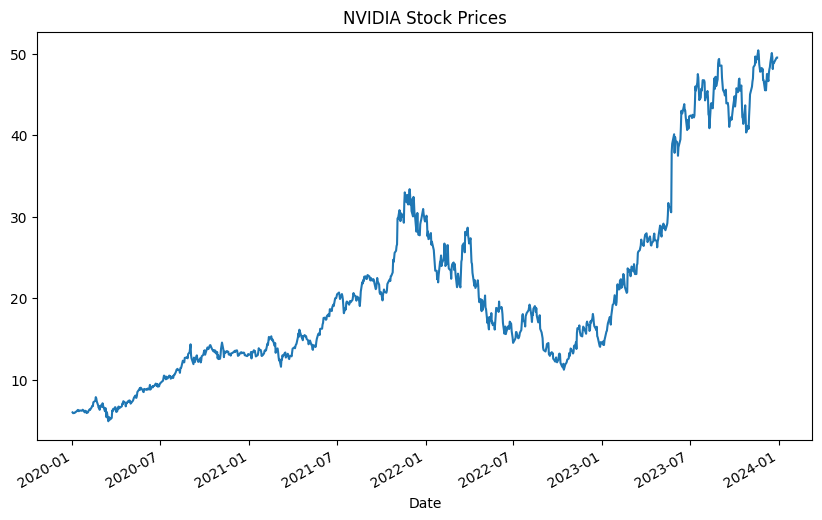

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

# Descargar datos de NVIDIA (NVDA)
data = yf.download('NVDA', start='2020-01-01', end='2024-01-01')

# Ver solo los precios de cierre
closing_prices = data['Close']
closing_prices.plot(title='NVIDIA Stock Prices', figsize=(10, 6))
plt.show()

En el gráfico de precios ajustados de cierre de NVIDIA que observamos, se pueden realizar las siguientes interpretaciones:

1. **Tendencia a largo plazo**: El gráfico muestra una clara tendencia alcista desde mediados de 2020, con un crecimiento sostenido que se vuelve más pronunciado a partir de 2023. Este aumento significativo puede estar relacionado con factores fundamentales de la empresa, como mejoras en los ingresos, innovación tecnológica o expansión en mercados clave.

2. **Volatilidad**: Observamos un aumento en la volatilidad durante el periodo 2021-2022, donde los precios fluctúan considerablemente en un intervalo de tiempo relativamente corto. Estas fluctuaciones podrían estar vinculadas a eventos específicos, como reportes de ganancias, movimientos del mercado, anuncios importantes de la empresa o cambios en la percepción del riesgo por parte de los inversionistas.

3. **Correcciones del mercado**: Se pueden notar varias correcciones durante el periodo, como la caída observada a finales de 2021 y otra caída significativa en la segunda mitad de 2022. Estas correcciones pueden estar relacionadas con el contexto macroeconómico, como aumentos en las tasas de interés, incertidumbre económica global, o problemas relacionados con la oferta y la demanda de semiconductores.

4. **Recuperación fuerte**: Después de la caída en 2022, hay un notable incremento en los precios a partir de 2023, lo que indica una fuerte recuperación. Esto sugiere que la empresa ha podido mitigar los efectos negativos que pudo haber sufrido y ha recobrado la confianza del mercado. También puede estar relacionado con una mayor demanda de sus productos, especialmente en áreas de alta tecnología como inteligencia artificial y hardware para videojuegos.

5. **Puntos de inflexión**: El gráfico también permite identificar algunos puntos de inflexión clave donde el comportamiento de la serie de precios cambia. Estos puntos son importantes para analizar la relación de la empresa con eventos del entorno económico o incluso su estrategia interna.

6. **Predicciones futuras**: Con base en este patrón, los analistas financieros podrían prever que, si las condiciones actuales del mercado continúan, es probable que la empresa mantenga una tendencia de crecimiento. Sin embargo, se deben analizar otros factores macroeconómicos, como políticas de regulación, fluctuaciones del mercado y las innovaciones tecnológicas en las que NVIDIA está involucrada.

En resumen, la serie de tiempo de los precios de cierre ajustados de NVIDIA refleja una tendencia general positiva a pesar de los episodios de alta volatilidad y las correcciones temporales. Este comportamiento es típico en empresas tecnológicas líderes en su sector, cuya volatilidad puede ser mayor debido a la sensibilidad a las noticias y la innovación tecnológica, pero que aún así muestran un crecimiento sólido a largo plazo.

## Verificamos la estacionariedad usando la prueba de Dickey-Fuller Aumentada (ADF)

In [ ]:
# ADF Test para revisar si los datos son estacionarios
adf_test = adfuller(closing_prices)
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])


ADF Statistic: 0.09280461175027704
p-value: 0.9655663840422918


La serie no es estacionaria dado que su p-value es mayor que 0.05, por tanto no rechaza la hipótesis nula.

## El modelo mediante Auto ARIMA

## 1.1. Identificación y Estimación

In [ ]:
# Auto ARIMA para encontrar el mejor modelo
stepwise_model = auto_arima(closing_prices, start_p=1, start_q=1,
                            max_p=5, max_q=5, seasonal=False,
                            trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)

# Mostrar el resumen del mejor modelo ARIMA
print(stepwise_model.summary())


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2217.135, Time=1.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2213.572, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2215.373, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2215.367, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2215.138, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.640 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1006
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1104.786
Date:                Wed, 23 Oct 2024   AIC                           2213.572
Time:                        04:31:14   BIC                           2223.397
Sample:                             0   HQIC                          2217.305
                               - 1006                                       

La imagen muestra los resultados obtenidos al aplicar el modelo ARIMA utilizando el método de Auto ARIMA para la serie de tiempo de los precios de NVIDIA. A continuación, se presentan las interpretaciones clave de los resultados:

### 1. **Mejor modelo seleccionado**
   - El mejor modelo ARIMA seleccionado es: **ARIMA(0,1,0)** con intercepto.
     - Esto significa que no hay componentes autorregresivos (AR), un componente de diferenciación de primer orden (D=1), y no hay medias móviles (MA). El modelo es de tipo *Random Walk*.
     - Este modelo fue seleccionado con base en el criterio de información de Akaike (AIC), que es **2213.572** para el mejor modelo. Además, se presenta el BIC (Criterio de Información Bayesiano) que es **2223.397**.

### 2. **Estimaciones de los parámetros**
   - **Intercepto**:
     - El coeficiente estimado del intercepto es **0.0433** con un error estándar de **0.024**. El valor de Z es **1.776** y el p-valor es **0.076**, lo cual indica que, al nivel de significancia del 5%, el intercepto no es estadísticamente significativo (p > 0.05), pero sí lo es al 10%.
   - **sigma2**:
     - La varianza residual estimada es **0.5277** con un error estándar de **0.009**. El p-valor asociado es altamente significativo (p < 0.001), lo que indica que este parámetro es relevante.

### 3. **Pruebas de diagnóstico**
   - **Ljung-Box (L1)**:
     - Esta prueba tiene un valor de Q = 0.20 y un p-valor de **0.66**. Esto sugiere que no hay autocorrelación significativa en los residuos del modelo, lo que indica que el ajuste es adecuado en cuanto a capturar la estructura temporal de la serie.
   - **Jarque-Bera (JB)**:
     - La prueba JB tiene un valor muy alto de **6494.12** y un p-valor de **0.00**, lo que sugiere que los residuos no siguen una distribución normal. Esto podría deberse a la presencia de valores extremos o alguna otra irregularidad en los datos.
   - **Heterocedasticidad (H)**:
     - La prueba de heterocedasticidad presenta un valor elevado (**7.39**), lo que indica que los residuos presentan varianza no constante. Esto puede ser un problema en la modelización, ya que indica que los errores no son homogéneos.

### 4. **Asimetría (Skew) y Curtosis (Kurt)**
   - **Skewness (Asimetría)**: El valor de la asimetría es **7.39**, lo que indica una fuerte asimetría positiva en los residuos.
   - **Kurtosis**: El valor de la curtosis es **15.18**, lo que indica una alta concentración de valores alrededor de la media y la presencia de colas más pesadas que las de una distribución normal, lo que refuerza la falta de normalidad de los residuos.
   
### Interpretación General:
- El modelo **ARIMA(0,1,0)** es un modelo de caminata aleatoria con un pequeño intercepto no significativo al 5%, lo que sugiere que los precios de NVIDIA siguen un patrón de cambio acumulativo aleatorio. El hecho de que los residuos no sean normales y presenten heterocedasticidad sugiere que podría ser útil investigar otros modelos o realizar transformaciones adicionales para mejorar el ajuste, como modelos GARCH que permitan capturar la volatilidad variable.

## 1.2. Chequeo

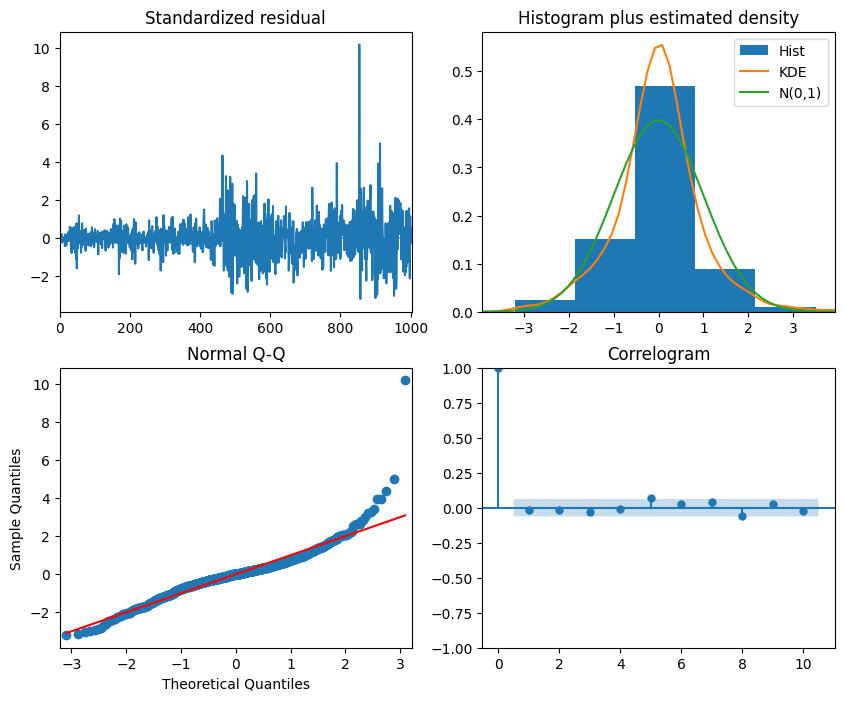

In [ ]:
# Entrenar el modelo final con los mejores parámetros
model = stepwise_model.fit(closing_prices)

# Diagnóstico del modelo: residuos
model.plot_diagnostics(figsize=(10, 8))
plt.show()


Este gráfico muestra un diagnóstico detallado de los residuos estandarizados del modelo ARIMA ajustado a los precios de cierre de NVIDIA:

### 1. **Standardized Residuals (Residuos estandarizados)**

- La mayoría de los residuos están cerca de 0, lo cual es un buen indicativo. Sin embargo, se observan algunos picos altos, especialmente alrededor de las observaciones 800-900, lo que sugiere la presencia de outliers o eventos puntuales que el modelo no ha capturado bien.
- La variabilidad parece aumentar en ciertos puntos, lo que podría indicar heterocedasticidad (varianza no constante), como lo sugería el análisis previo del modelo.

### 2. **Histogram plus estimated density (Histograma más densidad estimada)**
- La distribución de los residuos parece acercarse a la normal, pero presenta una ligera asimetría y algunos residuos se desvían hacia la derecha. Esto está en línea con el resultado de la prueba de Jarque-Bera, que sugería que los residuos no siguen una distribución normal perfecta.
- La curva KDE se ajusta bien a los datos en su mayor parte, pero hay desviaciones, especialmente en las colas.

### 3. **Normal Q-Q Plot**

- Los puntos siguen en general la línea roja, lo que indica que los residuos son aproximadamente normales. Sin embargo, en las colas, hay desviaciones importantes, con varios puntos alejados de la línea. Esto indica que los residuos no siguen exactamente una distribución normal y que hay presencia de valores extremos.
- Esto refuerza la idea de que la normalidad no se cumple completamente, con especial atención a los outliers.

### 4. **Correlogram (Correlograma de los residuos)**
   - Este gráfico muestra la autocorrelación de los residuos a diferentes rezagos.
   - **Interpretación**:
     - El primer rezago tiene una correlación significativa, pero los rezagos posteriores parecen no tener autocorrelación, ya que los puntos están dentro del intervalo de confianza.
     - En general, esto indica que no hay autocorrelación significativa en los residuos, lo que es un buen indicio de que el modelo ha capturado adecuadamente la estructura temporal de los datos.

### **Resumen General**
   - El modelo ARIMA parece ajustarse razonablemente bien a los datos, aunque hay indicios de que no captura por completo la distribución de los residuos, con problemas de normalidad (especialmente en las colas) y la posible presencia de heterocedasticidad (varianza variable a lo largo del tiempo).
   - Si bien el correlograma muestra que no hay autocorrelación significativa, lo que es positivo, la presencia de outliers y la no normalidad sugieren que el modelo podría mejorarse, tal vez mediante la inclusión de modelos que manejen mejor la varianza cambiante, como un modelo GARCH para la volatilidad.

## 2. El modelo mediante Grid Search

[*********************100%***********************]  1 of 1 completed


ARIMA(0, 0, 0) MSE=648.0922080110248
ARIMA(0, 0, 1) MSE=647.978533096365
ARIMA(0, 0, 2) MSE=647.7988142272399
ARIMA(0, 1, 0) MSE=367.88661787560426
ARIMA(0, 1, 1) MSE=367.8575413008224
ARIMA(0, 1, 2) MSE=366.85952500498433
ARIMA(1, 0, 0) MSE=466.8354845984826
ARIMA(1, 0, 1) MSE=460.47912795314585
ARIMA(1, 0, 2) MSE=452.145788884156
ARIMA(1, 1, 0) MSE=367.8878732316183
ARIMA(1, 1, 1) MSE=367.2032653980937
ARIMA(1, 1, 2) MSE=368.04406237039893
ARIMA(2, 0, 0) MSE=460.7592693185983
ARIMA(2, 0, 1) MSE=464.6385081555808
ARIMA(2, 0, 2) MSE=459.31322212743436
ARIMA(2, 1, 0) MSE=367.05433067666195
ARIMA(2, 1, 1) MSE=368.2410303921734
ARIMA(2, 1, 2) MSE=367.6388833802091
Best ARIMA(0, 1, 2) MSE=366.85952500498433
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  804
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -740.701
Date:                Wed, 23 Oct 2024   AIC       

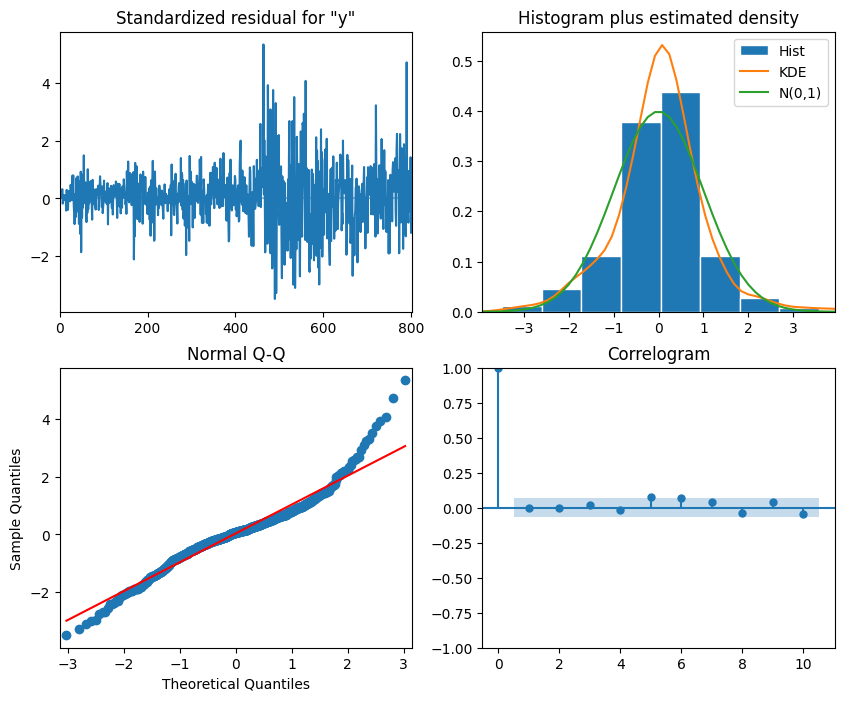

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# Descargar datos de NVIDIA (NVDA)
data = yf.download('NVDA', start='2020-01-01', end='2024-01-01')
closing_prices = data['Close'].dropna()  # Asegurarse de que no hay valores NaN

# Definir el rango de parámetros para el Grid Search
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

# Función para evaluar un modelo ARIMA con una combinación específica de (p, d, q)
def evaluate_arima_model(X, arima_order):
    # Dividir los datos en entrenamiento y prueba
    train_size = int(len(X) * 0.8)
    train, test = X[0:train_size], X[train_size:]

    # Ajustar el modelo ARIMA
    model = ARIMA(train, order=arima_order)
    model_fit = model.fit()

    # Hacer predicciones
    forecast = model_fit.forecast(steps=len(test))

    # Calcular el error del modelo
    error = mean_squared_error(test, forecast)

    return error, model_fit

# Función para realizar Grid Search sobre los valores de p, d, q
def grid_search_arima(X, p_values, d_values, q_values):
    best_score, best_cfg, best_model = float("inf"), None, None

    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    order = (p, d, q)
                    mse, model_fit = evaluate_arima_model(X, order)
                    if mse < best_score:
                        best_score, best_cfg, best_model = mse, order, model_fit
                    print(f'ARIMA{order} MSE={mse}')
                except Exception as e:
                    print(f'Error al ajustar ARIMA{(p, d, q)}: {e}')
                    continue
    if best_model:
        print(f'Best ARIMA{best_cfg} MSE={best_score}')
    else:
        print('No se encontró un modelo ARIMA válido.')
    return best_model

# Ejecutar el Grid Search y obtener el mejor modelo
best_model = grid_search_arima(closing_prices.values, p_values, d_values, q_values)

# Mostrar el diagnóstico del mejor modelo, si existe
if best_model:
    print(best_model.summary())

    # Gráficos de diagnóstico del modelo ajustado
    best_model.plot_diagnostics(figsize=(10, 8))
    plt.show()
else:
    print('No hay un modelo disponible para mostrar el diagnóstico.')


El proceso de Grid Search evaluó múltiples combinaciones de parámetros de autorregresión (AR), diferenciación (D), y medias móviles (MA) para encontrar el mejor ajuste de acuerdo con la métrica **MSE** (Error Cuadrático Medio) y otros criterios de información.

### 1. **Mejor modelo seleccionado**
   - El modelo que obtuvo el menor MSE fue el **ARIMA(0,1,2)**, con un MSE de **366.85952500498433**.
   - Este modelo se basa en un componente de diferenciación de primer orden (D=1) y dos componentes de medias móviles (MA=2), sin componente autorregresivo (AR=0).

### 2. **Estimaciones de los parámetros del modelo**
   - **ma.L1 (coeficiente del primer rezago de MA)**: El coeficiente es **-0.0373**, con un error estándar de **0.030**. El valor Z es **-1.232** y el p-valor asociado es **0.218**, lo cual indica que este parámetro no es estadísticamente significativo al nivel de significancia del 5%.
   - **ma.L2 (coeficiente del segundo rezago de MA)**: El coeficiente es **-0.0541**, con un error estándar de **0.024**. El valor Z es **-2.233**, y el p-valor es **0.026**, lo que indica que este coeficiente **sí es estadísticamente significativo** (p < 0.05).
   - **sigma2 (varianza residual)**: El valor de la varianza residual estimada es **0.3847**, con un error estándar de **0.012**, lo cual es significativo con un p-valor muy bajo.

### 3. **Criterios de información**
   - El **AIC (Criterio de Información de Akaike)** es **1487.401**, lo cual indica un buen ajuste en comparación con otros modelos.
   - El **BIC (Criterio de Información Bayesiano)** es **1501.467**. Aunque es ligeramente mayor que el AIC, este valor sigue siendo bajo, lo que sugiere un buen equilibrio entre la complejidad del modelo y su ajuste a los datos.
   - El **HQIC (Criterio de Información Hannan-Quinn)** es **1492.804**, que también refleja una buena calidad del modelo.

### 4. **Pruebas de diagnóstico**
   - **Ljung-Box (L1)**: El valor de Q es **0.01** con un p-valor de **0.94**, lo que sugiere que no hay autocorrelación significativa en los residuos del modelo, un buen indicativo de que el modelo ha capturado la estructura temporal de los datos.
   - **Jarque-Bera (JB)**: El valor de la prueba es **308.42** con un p-valor de **0.00**, lo que indica que los residuos no siguen una distribución normal.
   - **Heterocedasticidad (H)**: El valor de la prueba es **5.54**, lo que indica que hay heterocedasticidad en los residuos, es decir, varianza no constante, como ya se sugirió en análisis previos.
   - **Skewness y Kurtosis**: La asimetría (Skew) es baja (**0.35**), pero la curtosis es elevada (**5.95**), lo que indica colas más pesadas que las de una distribución normal.

### Interpretación General:
- El modelo **ARIMA(0,1,2)** ha sido seleccionado como el mejor en términos de MSE y ajusta bien los datos, especialmente considerando el valor bajo del AIC.
- Aunque los coeficientes de las medias móviles indican que el segundo término es estadísticamente significativo, el primer término no lo es, lo que podría indicar que la estructura de medias móviles podría ajustarse mejor con otros rezagos.
- Los residuos presentan algunos problemas con la normalidad y la heterocedasticidad, lo que sugiere que el modelo podría mejorarse si se toman en cuenta estos aspectos, por ejemplo, utilizando modelos que manejen la varianza cambiante (como GARCH).


## 3. Predicción:

[*********************100%***********************]  1 of 1 completed


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1489.378, Time=1.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1488.005, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1488.811, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1488.661, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1486.969, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1489.672, Time=0.35 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.800 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  804
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -742.484
Date:                Wed, 23 Oct 2024   AIC                           1486.969
Time:                        06:30:34   BIC                           1491.657
Sample:                             0   HQIC                          1488.770
          

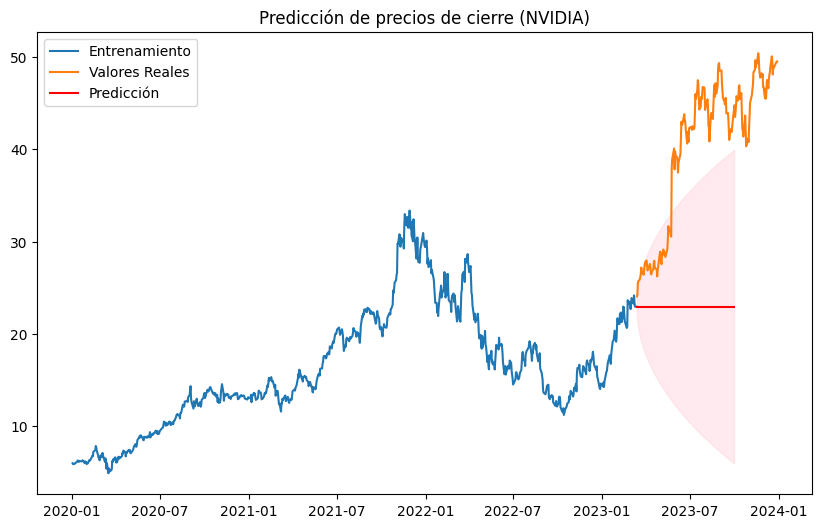

Mean Squared Error (MSE) de la predicción: 367.88661787560426


In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import pandas as pd
from sklearn.metrics import mean_squared_error

# Descargar datos de NVIDIA (NVDA)
data = yf.download('NVDA', start='2020-01-01', end='2024-01-01')
closing_prices = data['Close'].dropna()  # Asegurarse de que no haya valores nulos

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
train_size = int(len(closing_prices) * 0.8)
train, test = closing_prices[:train_size], closing_prices[train_size:]

# Entrenar el modelo auto_arima
model = auto_arima(train, seasonal=False, trace=True, stepwise=True, suppress_warnings=True)

# Mostrar el resumen del modelo
print(model.summary())

# Hacer predicciones para el conjunto de prueba
n_periods = len(test)
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

# Crear un DataFrame para las predicciones y los datos reales
forecast_index = pd.date_range(start=test.index[0], periods=n_periods, freq='D')
forecast_df = pd.DataFrame({'Predicción': forecast, 'CI Inferior': conf_int[:, 0], 'CI Superior': conf_int[:, 1]}, index=forecast_index)

# Gráfico de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Entrenamiento')
plt.plot(test.index, test, label='Valores Reales')
plt.plot(forecast_index, forecast, label='Predicción', color='r')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.title('Predicción de precios de cierre (NVIDIA)')
plt.legend()
plt.show()

# Calcular el error de predicción
mse = mean_squared_error(test, forecast)
print(f'Mean Squared Error (MSE) de la predicción: {mse}')

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1489.378, Time=3.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1488.005, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1488.811, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1488.661, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1486.969, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1489.672, Time=1.00 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 5.241 seconds


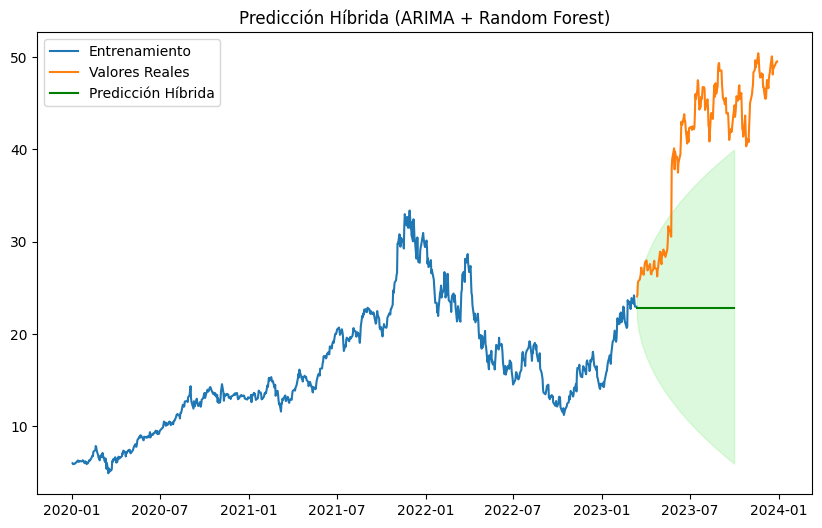

Mean Squared Error (MSE) del modelo híbrido: 371.94361610775377


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Entrenar ARIMA
model_arima = auto_arima(train, seasonal=False, trace=True, stepwise=True, suppress_warnings=True)
model_arima.fit(train)

# Obtener los residuos del modelo ARIMA
residuals = model_arima.resid()

# Crear el conjunto de datos para Random Forest (X: índices de tiempo, y: residuos)
X_rf = np.arange(len(residuals)).reshape(-1, 1)
y_rf = residuals

# Entrenar el modelo Random Forest con los residuos de ARIMA
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_rf, y_rf)

# Predicciones ARIMA
forecast_arima, conf_int = model_arima.predict(n_periods=n_periods, return_conf_int=True)

# Predicciones Random Forest sobre el período de prueba
X_test_rf = np.arange(len(residuals), len(residuals) + n_periods).reshape(-1, 1)
forecast_rf = rf_model.predict(X_test_rf)

# Sumar las predicciones de ARIMA y Random Forest (modelo híbrido)
forecast_hybrid = forecast_arima + forecast_rf

# Crear DataFrame para comparar las predicciones con los datos reales
forecast_hybrid_df = pd.DataFrame({'Predicción Híbrida': forecast_hybrid}, index=forecast_index)

# Gráfico de predicción híbrida vs valores reales
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Entrenamiento')
plt.plot(test.index, test, label='Valores Reales')
plt.plot(forecast_index, forecast_hybrid, label='Predicción Híbrida', color='g')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='lightgreen', alpha=0.3)
plt.title('Predicción Híbrida (ARIMA + Random Forest)')
plt.legend()
plt.show()

# Calcular el error de la predicción híbrida
mse_hybrid = mean_squared_error(test, forecast_hybrid)
print(f'Mean Squared Error (MSE) del modelo híbrido: {mse_hybrid}')

El gráfico muestra la **predicción híbrida** de los precios de las acciones de NVIDIA utilizando una combinación de dos métodos: **ARIMA** y **Random Forest**:

### 1. **Sección de entrenamiento (línea azul)**
   - La línea azul muestra los precios históricos de las acciones de NVIDIA, los cuales se utilizaron para entrenar los modelos. Desde 2020 hasta inicios de 2023, se observa una clara tendencia ascendente, con algunas correcciones en el medio. Estos datos sirven como base para el entrenamiento tanto del modelo ARIMA como del modelo Random Forest.

### 2. **Valores reales (línea naranja)**
   - La línea naranja refleja los **valores reales** (observados) para el periodo posterior al entrenamiento, desde aproximadamente 2023. Esta parte del gráfico representa la evolución real de los precios de las acciones de NVIDIA después de que el modelo fue entrenado, lo que sirve para evaluar la precisión del modelo.

### 3. **Predicción híbrida (línea verde)**
   - La línea verde es la **predicción híbrida** generada mediante la combinación de los modelos ARIMA y Random Forest.
   - **Interpretación**: La predicción se muestra extendida hacia el futuro (2024), con un intervalo sombreado en verde que representa la **incertidumbre** o el rango de confianza de la predicción.
   - El modelo predice una continuación de la tendencia al alza en los precios, lo cual está en línea con el comportamiento reciente de los valores reales. Esto sugiere que el modelo híbrido espera que los precios de las acciones de NVIDIA sigan creciendo en el corto plazo, aunque también reconoce que puede haber cierta variabilidad (reflejada en el área sombreada).

### 4. **Rango de predicción (área sombreada en verde)**
   - El área sombreada en verde alrededor de la predicción indica el **intervalo de confianza** o la **incertidumbre** asociada con la predicción del modelo. Este intervalo es más amplio a medida que se proyecta más lejos en el tiempo, lo cual es natural, ya que la incertidumbre sobre los precios futuros aumenta con el tiempo.
   - Este rango también sugiere que, aunque la tendencia central es alcista, los precios de las acciones podrían fluctuar dentro de un rango relativamente amplio.

### 5. **Error Cuadrático Medio (MSE) del modelo híbrido**
   - En la parte inferior del gráfico se muestra el **MSE (Error Cuadrático Medio)** del modelo híbrido, que es **371.9436**. Este valor cuantifica el error promedio entre los valores predichos por el modelo y los valores reales observados.
   - Un MSE relativamente bajo, como el que se muestra, indica que el modelo tiene un buen ajuste y que las predicciones generadas están razonablemente cerca de los valores reales. Sin embargo, siempre se debe tener en cuenta que el MSE no captura todas las dinámicas de error, y las fluctuaciones futuras podrían ser más amplias de lo que el modelo predice.

### Conclusión:
El gráfico muestra que el modelo híbrido ARIMA + Random Forest está prediciendo un crecimiento sostenido en los precios de las acciones de NVIDIA para 2024, con un margen de incertidumbre representado por el área sombreada. La predicción parece bastante consistente con los datos reales recientes (línea naranja), aunque el intervalo de confianza sugiere que podrían ocurrir fluctuaciones dentro de un rango. El MSE relativamente bajo respalda la precisión del modelo, pero es importante monitorear continuamente cómo se ajustan las predicciones a medida que se obtienen nuevos datos.